### Seq2VAR: multivariate time series representation with relational neural networks and linear autoregressive model

##### Edouard Pineau, Sébastien Razakarivony, Thomas Bonald


### ===========================================================================================

## Setup

The appendices 'data_generator_permutations.py', 'argument_parser_permutations.py', 'utils.py' and 'modules.py' contain the required supplementary python code for running this notebook. 

In [1]:
import copy
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import time

from utils import *
from modules import *
from data_generator_permutations import *
from argument_parser_permutations import *

from itertools import permutations
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
args = argument_parser()
print(args)

Namespace(batch_size=128, cuda=True, in_dim=1, lag=1, nb_samples_per_system=100, nb_systems=10, num_atoms=10, sd=0, timesteps=25)


### Sample data with additive observation noise

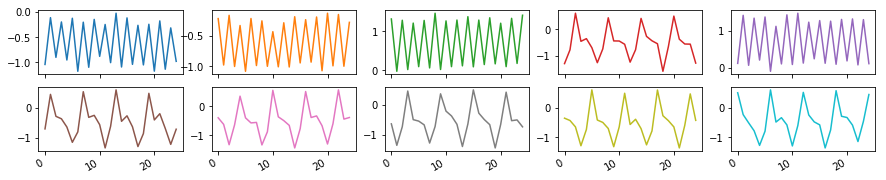

In [3]:
### Standard deviation of the additive noise over the observations
args.sd = 0.1

v, ml, l = generate_permutation_ts(args.num_atoms, args.timesteps, 1, 1, sd=args.sd)
pd.DataFrame(v[0, :, :, 0].T).plot(subplots=True, layout=(4, 5), figsize=(15, 6), legend=False);

In [4]:
X_train, A_train, labels_train = generate_permutation_ts(args.num_atoms, 
                                                         args.timesteps, 
                                                         args.nb_systems, 
                                                         args.nb_samples_per_system, 
                                                         args.sd)
X_test, A_test, labels_test = generate_permutation_ts(args.num_atoms, 
                                                      args.timesteps, 
                                                      args.nb_systems, 
                                                      args.nb_samples_per_system, 
                                                      args.sd)

In [ ]:
X_train = torch.FloatTensor(X_train)
labels_train = torch.FloatTensor(labels_train)
X_test = torch.FloatTensor(X_test)
labels_test = torch.FloatTensor(labels_test)

train_data = TensorDataset(X_train, labels_train)
train_data_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True)

test_data = TensorDataset(X_test, labels_test)
test_data_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False)

# Training the different models

### Matrix estimation with standard VAR

VAR has no inference mechanism shared by any number of samples. It is one VAR for one sample. Each new sample requires the fitting of a VAR for representation learning. 

Therefore, no training is required here, we learn at test time.

### Seq2VAR: relational encoder with linear decoder for MTS representation learning

In [ ]:
args_seq2var = argument_parser_seq2var()
print(args_seq2var)

Namespace(encoder_hidden=64, epochs=3000, lr=0.001, prior=0.1, tau=0.5)


In [ ]:
encoder_seq2var = RelationalEncoder(args.timesteps, args_seq2var.encoder_hidden, args.lag)

if args.cuda:
    encoder_seq2var = encoder_seq2var.cuda()

optimizer_encoder = optim.Adam(encoder_seq2var.parameters(), lr=args_seq2var.lr)
scheduler = optim.lr_scheduler.StepLR(optimizer_encoder, step_size=250, gamma=0.5)

/home/epineau/anaconda3/envs/edouard/lib/python3.6/site-packages/torch/cuda/__init__.py:116: UserWarning: 
    Found GPU0 Quadro K4000 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [ ]:
train_seq2var(train_data_loader, encoder_seq2var, optimizer_encoder, scheduler, args, args_seq2var, binary=False)

Epoch: 0000 loss: 2459.41251 time: 1.1578s
Epoch: 0001 loss: 1476.27592 time: 0.4501s
Epoch: 0002 loss: 864.64468 time: 0.4491s
Epoch: 0003 loss: 564.67512 time: 0.4561s
Epoch: 0004 loss: 430.12761 time: 0.4556s
Epoch: 0005 loss: 348.13059 time: 0.4484s
Epoch: 0006 loss: 311.76796 time: 0.4638s
Epoch: 0007 loss: 290.02477 time: 0.4475s
Epoch: 0008 loss: 242.58115 time: 0.4589s
Epoch: 0009 loss: 238.21994 time: 0.4559s
Epoch: 0010 loss: 228.17405 time: 0.4520s
Epoch: 0011 loss: 244.22325 time: 0.4508s
Epoch: 0012 loss: 239.27704 time: 0.4538s
Epoch: 0013 loss: 237.79220 time: 0.4627s
Epoch: 0014 loss: 206.20470 time: 0.4516s
Epoch: 0015 loss: 190.89199 time: 0.4568s
Epoch: 0016 loss: 186.66541 time: 0.4492s
Epoch: 0017 loss: 169.13961 time: 0.4498s
Epoch: 0018 loss: 173.14935 time: 0.4544s
Epoch: 0019 loss: 202.05639 time: 0.4535s
Epoch: 0020 loss: 167.05964 time: 0.4509s
Epoch: 0021 loss: 153.24531 time: 0.4544s
Epoch: 0022 loss: 155.23828 time: 0.4558s
Epoch: 0023 loss: 181.87696 time

Epoch: 0199 loss: 32.69061 time: 0.4531s
Epoch: 0200 loss: 28.08249 time: 0.4526s
Epoch: 0201 loss: 31.69907 time: 0.4631s
Epoch: 0202 loss: 29.80719 time: 0.4516s
Epoch: 0203 loss: 29.55075 time: 0.4533s
Epoch: 0204 loss: 25.11290 time: 0.4549s
Epoch: 0205 loss: 22.73569 time: 0.4651s
Epoch: 0206 loss: 27.08316 time: 0.4513s
Epoch: 0207 loss: 25.06907 time: 0.4507s
Epoch: 0208 loss: 31.46974 time: 0.4510s
Epoch: 0209 loss: 23.72904 time: 0.4511s
Epoch: 0210 loss: 30.59471 time: 0.4489s
Epoch: 0211 loss: 24.53212 time: 0.4479s
Epoch: 0212 loss: 23.53457 time: 0.4475s
Epoch: 0213 loss: 24.08362 time: 0.4481s
Epoch: 0214 loss: 24.40096 time: 0.4490s
Epoch: 0215 loss: 28.07400 time: 0.4506s
Epoch: 0216 loss: 27.72370 time: 0.4527s
Epoch: 0217 loss: 21.17455 time: 0.4546s
Epoch: 0218 loss: 22.96574 time: 0.5075s
Epoch: 0219 loss: 22.36592 time: 0.5036s
Epoch: 0220 loss: 21.35286 time: 0.4557s
Epoch: 0221 loss: 21.89338 time: 0.4488s
Epoch: 0222 loss: 20.27854 time: 0.4517s
Epoch: 0223 loss

Epoch: 0399 loss: 11.44986 time: 0.4573s
Epoch: 0400 loss: 10.90527 time: 0.4537s
Epoch: 0401 loss: 11.22458 time: 0.4555s
Epoch: 0402 loss: 10.54444 time: 0.4584s
Epoch: 0403 loss: 10.88909 time: 0.4577s
Epoch: 0404 loss: 11.51491 time: 0.4554s
Epoch: 0405 loss: 10.21017 time: 0.4483s
Epoch: 0406 loss: 10.87398 time: 0.4483s
Epoch: 0407 loss: 11.87401 time: 0.4491s
Epoch: 0408 loss: 11.07760 time: 0.4495s
Epoch: 0409 loss: 11.07211 time: 0.4491s
Epoch: 0410 loss: 10.99036 time: 0.4485s
Epoch: 0411 loss: 10.37331 time: 0.4485s
Epoch: 0412 loss: 10.64056 time: 0.4498s
Epoch: 0413 loss: 9.65008 time: 0.4486s
Epoch: 0414 loss: 10.81980 time: 0.4492s
Epoch: 0415 loss: 10.83787 time: 0.4492s
Epoch: 0416 loss: 10.05353 time: 0.4493s
Epoch: 0417 loss: 10.63236 time: 0.4499s
Epoch: 0418 loss: 10.48347 time: 0.4506s
Epoch: 0419 loss: 11.39889 time: 0.4500s
Epoch: 0420 loss: 10.67158 time: 0.4481s
Epoch: 0421 loss: 9.93551 time: 0.4478s
Epoch: 0422 loss: 9.68829 time: 0.4491s
Epoch: 0423 loss: 1

Epoch: 0604 loss: 6.50539 time: 0.4510s
Epoch: 0605 loss: 6.39867 time: 0.4511s
Epoch: 0606 loss: 6.90238 time: 0.4517s
Epoch: 0607 loss: 6.40598 time: 0.4494s
Epoch: 0608 loss: 6.47536 time: 0.4483s
Epoch: 0609 loss: 6.70895 time: 0.4492s
Epoch: 0610 loss: 6.35469 time: 0.4482s
Epoch: 0611 loss: 6.47976 time: 0.4478s
Epoch: 0612 loss: 6.43732 time: 0.4480s
Epoch: 0613 loss: 6.49793 time: 0.4487s
Epoch: 0614 loss: 6.29282 time: 0.4485s
Epoch: 0615 loss: 6.29575 time: 0.4484s
Epoch: 0616 loss: 6.63288 time: 0.4562s
Epoch: 0617 loss: 6.38682 time: 0.4488s
Epoch: 0618 loss: 6.61530 time: 0.4490s
Epoch: 0619 loss: 6.54728 time: 0.4494s
Epoch: 0620 loss: 6.23943 time: 0.4492s
Epoch: 0621 loss: 6.41588 time: 0.4497s
Epoch: 0622 loss: 6.24111 time: 0.4493s
Epoch: 0623 loss: 6.17809 time: 0.4485s
Epoch: 0624 loss: 6.30451 time: 0.4485s
Epoch: 0625 loss: 6.22589 time: 0.4479s
Epoch: 0626 loss: 6.30930 time: 0.4479s
Epoch: 0627 loss: 6.51213 time: 0.4488s
Epoch: 0628 loss: 6.23271 time: 0.4485s


Epoch: 0809 loss: 5.23878 time: 0.4506s
Epoch: 0810 loss: 5.19448 time: 0.4507s
Epoch: 0811 loss: 5.17672 time: 0.4531s
Epoch: 0812 loss: 5.16815 time: 0.4541s
Epoch: 0813 loss: 5.13998 time: 0.4533s
Epoch: 0814 loss: 5.14654 time: 0.4532s
Epoch: 0815 loss: 5.25810 time: 0.4543s
Epoch: 0816 loss: 5.16022 time: 0.4544s
Epoch: 0817 loss: 5.16000 time: 0.4533s
Epoch: 0818 loss: 5.16328 time: 0.4550s
Epoch: 0819 loss: 5.16340 time: 0.4605s
Epoch: 0820 loss: 5.13955 time: 0.4575s
Epoch: 0821 loss: 5.16156 time: 0.4547s
Epoch: 0822 loss: 5.14757 time: 0.4548s
Epoch: 0823 loss: 5.17410 time: 0.4540s
Epoch: 0824 loss: 5.14678 time: 0.4548s
Epoch: 0825 loss: 5.15687 time: 0.4541s
Epoch: 0826 loss: 5.17196 time: 0.4519s
Epoch: 0827 loss: 5.15128 time: 0.4529s
Epoch: 0828 loss: 5.13656 time: 0.4540s
Epoch: 0829 loss: 5.14152 time: 0.4534s
Epoch: 0830 loss: 5.13258 time: 0.4532s
Epoch: 0831 loss: 5.12648 time: 0.4542s
Epoch: 0832 loss: 5.13411 time: 0.4537s
Epoch: 0833 loss: 5.10485 time: 0.4523s


Epoch: 1014 loss: 4.88903 time: 0.4478s
Epoch: 1015 loss: 4.88974 time: 0.4494s
Epoch: 1016 loss: 4.87588 time: 0.4493s
Epoch: 1017 loss: 4.89138 time: 0.4501s
Epoch: 1018 loss: 4.88220 time: 0.4497s
Epoch: 1019 loss: 4.88545 time: 0.4504s
Epoch: 1020 loss: 4.89554 time: 0.4497s
Epoch: 1021 loss: 4.87165 time: 0.4510s
Epoch: 1022 loss: 4.90846 time: 0.4506s
Epoch: 1023 loss: 4.88819 time: 0.4510s
Epoch: 1024 loss: 4.90757 time: 0.4515s
Epoch: 1025 loss: 4.91020 time: 0.4512s
Epoch: 1026 loss: 4.86141 time: 0.4511s
Epoch: 1027 loss: 4.89524 time: 0.4508s
Epoch: 1028 loss: 4.88793 time: 0.4488s
Epoch: 1029 loss: 4.87028 time: 0.4488s
Epoch: 1030 loss: 4.86181 time: 0.4496s
Epoch: 1031 loss: 4.85920 time: 0.4496s
Epoch: 1032 loss: 4.86109 time: 0.4497s
Epoch: 1033 loss: 4.85368 time: 0.4504s
Epoch: 1034 loss: 4.88602 time: 0.4502s
Epoch: 1035 loss: 4.86636 time: 0.4507s
Epoch: 1036 loss: 4.86526 time: 0.4498s
Epoch: 1037 loss: 4.85982 time: 0.4499s
Epoch: 1038 loss: 4.90748 time: 0.4502s


Epoch: 1219 loss: 4.76797 time: 0.4490s
Epoch: 1220 loss: 4.75791 time: 0.4504s
Epoch: 1221 loss: 4.76655 time: 0.4516s
Epoch: 1222 loss: 4.77525 time: 0.4491s
Epoch: 1223 loss: 4.78507 time: 0.4497s
Epoch: 1224 loss: 4.76542 time: 0.4570s
Epoch: 1225 loss: 4.77556 time: 0.4496s
Epoch: 1226 loss: 4.76440 time: 0.4556s
Epoch: 1227 loss: 4.78987 time: 0.4510s
Epoch: 1228 loss: 4.78620 time: 0.4595s
Epoch: 1229 loss: 4.78173 time: 0.4568s
Epoch: 1230 loss: 4.75389 time: 0.4561s
Epoch: 1231 loss: 4.78916 time: 0.4586s
Epoch: 1232 loss: 4.75528 time: 0.4619s
Epoch: 1233 loss: 4.76030 time: 0.4691s
Epoch: 1234 loss: 4.75818 time: 0.4637s
Epoch: 1235 loss: 4.76994 time: 0.4640s
Epoch: 1236 loss: 4.75358 time: 0.4598s
Epoch: 1237 loss: 4.75000 time: 0.4600s
Epoch: 1238 loss: 4.74697 time: 0.4639s
Epoch: 1239 loss: 4.75409 time: 0.4562s
Epoch: 1240 loss: 4.75385 time: 0.4547s
Epoch: 1241 loss: 4.76626 time: 0.4531s
Epoch: 1242 loss: 4.77580 time: 0.4571s
Epoch: 1243 loss: 4.79770 time: 0.4529s


Epoch: 1424 loss: 4.71317 time: 0.4613s
Epoch: 1425 loss: 4.70666 time: 0.4504s
Epoch: 1426 loss: 4.68290 time: 0.4493s
Epoch: 1427 loss: 4.68467 time: 0.4499s
Epoch: 1428 loss: 4.68526 time: 0.4493s
Epoch: 1429 loss: 4.70747 time: 0.4501s
Epoch: 1430 loss: 4.69989 time: 0.4531s
Epoch: 1431 loss: 4.72053 time: 0.4543s
Epoch: 1432 loss: 4.70656 time: 0.4592s
Epoch: 1433 loss: 4.70734 time: 0.4533s
Epoch: 1434 loss: 4.68597 time: 0.4522s
Epoch: 1435 loss: 4.69478 time: 0.4526s
Epoch: 1436 loss: 4.70530 time: 0.4555s
Epoch: 1437 loss: 4.68779 time: 0.4562s
Epoch: 1438 loss: 4.69356 time: 0.4544s
Epoch: 1439 loss: 4.69394 time: 0.4543s
Epoch: 1440 loss: 4.69384 time: 0.4497s
Epoch: 1441 loss: 4.67300 time: 0.4492s
Epoch: 1442 loss: 4.68968 time: 0.4508s
Epoch: 1443 loss: 4.69322 time: 0.4491s
Epoch: 1444 loss: 4.68750 time: 0.4504s
Epoch: 1445 loss: 4.68473 time: 0.4602s
Epoch: 1446 loss: 4.68707 time: 0.4509s
Epoch: 1447 loss: 4.69764 time: 0.4589s
Epoch: 1448 loss: 4.68874 time: 0.4588s


Epoch: 1629 loss: 4.63667 time: 0.4500s
Epoch: 1630 loss: 4.65560 time: 0.4499s
Epoch: 1631 loss: 4.64058 time: 0.4522s
Epoch: 1632 loss: 4.64768 time: 0.4652s
Epoch: 1633 loss: 4.65462 time: 0.4536s
Epoch: 1634 loss: 4.65016 time: 0.4532s
Epoch: 1635 loss: 4.63875 time: 0.4575s
Epoch: 1636 loss: 4.64117 time: 0.4571s
Epoch: 1637 loss: 4.64413 time: 0.4527s
Epoch: 1638 loss: 4.64271 time: 0.4520s
Epoch: 1639 loss: 4.63871 time: 0.4503s
Epoch: 1640 loss: 4.65704 time: 0.4627s
Epoch: 1641 loss: 4.63638 time: 0.4539s
Epoch: 1642 loss: 4.64012 time: 0.4543s
Epoch: 1643 loss: 4.63404 time: 0.4533s
Epoch: 1644 loss: 4.64791 time: 0.4498s
Epoch: 1645 loss: 4.65437 time: 0.4476s
Epoch: 1646 loss: 4.62619 time: 0.4482s
Epoch: 1647 loss: 4.64639 time: 0.4481s
Epoch: 1648 loss: 4.65195 time: 0.4476s
Epoch: 1649 loss: 4.63240 time: 0.4499s
Epoch: 1650 loss: 4.64770 time: 0.4549s
Epoch: 1651 loss: 4.65507 time: 0.4458s
Epoch: 1652 loss: 4.65757 time: 0.4465s
Epoch: 1653 loss: 4.63877 time: 0.4453s


Epoch: 1834 loss: 4.63375 time: 0.4554s
Epoch: 1835 loss: 4.62814 time: 0.4527s
Epoch: 1836 loss: 4.62382 time: 0.4524s
Epoch: 1837 loss: 4.60777 time: 0.4534s
Epoch: 1838 loss: 4.60640 time: 0.4535s
Epoch: 1839 loss: 4.63156 time: 0.4543s
Epoch: 1840 loss: 4.60319 time: 0.4552s
Epoch: 1841 loss: 4.62556 time: 0.4618s
Epoch: 1842 loss: 4.62648 time: 0.4519s
Epoch: 1843 loss: 4.61733 time: 0.4524s
Epoch: 1844 loss: 4.64485 time: 0.4522s
Epoch: 1845 loss: 4.62214 time: 0.4566s
Epoch: 1846 loss: 4.60684 time: 0.4513s
Epoch: 1847 loss: 4.61953 time: 0.4605s
Epoch: 1848 loss: 4.63810 time: 0.4567s
Epoch: 1849 loss: 4.61879 time: 0.4584s
Epoch: 1850 loss: 4.60790 time: 0.4547s
Epoch: 1851 loss: 4.63184 time: 0.4551s
Epoch: 1852 loss: 4.61727 time: 0.4566s
Epoch: 1853 loss: 4.63104 time: 0.4565s
Epoch: 1854 loss: 4.61003 time: 0.4556s
Epoch: 1855 loss: 4.62377 time: 0.4561s
Epoch: 1856 loss: 4.59469 time: 0.4559s
Epoch: 1857 loss: 4.62322 time: 0.4559s
Epoch: 1858 loss: 4.62430 time: 0.4556s


Epoch: 2039 loss: 4.60442 time: 0.4508s
Epoch: 2040 loss: 4.59943 time: 0.4502s
Epoch: 2041 loss: 4.59864 time: 0.4500s
Epoch: 2042 loss: 4.60207 time: 0.4509s
Epoch: 2043 loss: 4.60435 time: 0.4499s
Epoch: 2044 loss: 4.59651 time: 0.4503s
Epoch: 2045 loss: 4.59875 time: 0.4502s
Epoch: 2046 loss: 4.60747 time: 0.4523s
Epoch: 2047 loss: 4.58703 time: 0.4508s
Epoch: 2048 loss: 4.61649 time: 0.4583s
Epoch: 2049 loss: 4.60397 time: 0.4576s
Epoch: 2050 loss: 4.59144 time: 0.4512s
Epoch: 2051 loss: 4.59704 time: 0.4517s
Epoch: 2052 loss: 4.62124 time: 0.4561s
Epoch: 2053 loss: 4.59715 time: 0.4601s
Epoch: 2054 loss: 4.60481 time: 0.4521s
Epoch: 2055 loss: 4.59942 time: 0.4520s
Epoch: 2056 loss: 4.63994 time: 0.4527s
Epoch: 2057 loss: 4.61271 time: 0.4619s
Epoch: 2058 loss: 4.59504 time: 0.4552s
Epoch: 2059 loss: 4.59453 time: 0.4553s
Epoch: 2060 loss: 4.62454 time: 0.4597s
Epoch: 2061 loss: 4.60338 time: 0.4586s
Epoch: 2062 loss: 4.60676 time: 0.4518s
Epoch: 2063 loss: 4.58812 time: 0.4509s


Epoch: 2244 loss: 4.58891 time: 0.4558s
Epoch: 2245 loss: 4.58431 time: 0.4535s
Epoch: 2246 loss: 4.58948 time: 0.4522s
Epoch: 2247 loss: 4.59988 time: 0.4518s
Epoch: 2248 loss: 4.58144 time: 0.4560s
Epoch: 2249 loss: 4.59490 time: 0.4513s
Epoch: 2250 loss: 4.58877 time: 0.4506s
Epoch: 2251 loss: 4.58974 time: 0.4526s
Epoch: 2252 loss: 4.59499 time: 0.4512s
Epoch: 2253 loss: 4.58522 time: 0.4567s
Epoch: 2254 loss: 4.59183 time: 0.4526s
Epoch: 2255 loss: 4.58207 time: 0.4513s
Epoch: 2256 loss: 4.59059 time: 0.4539s
Epoch: 2257 loss: 4.59690 time: 0.4518s
Epoch: 2258 loss: 4.60397 time: 0.4508s
Epoch: 2259 loss: 4.59611 time: 0.4516s
Epoch: 2260 loss: 4.61977 time: 0.4507s
Epoch: 2261 loss: 4.59305 time: 0.4519s
Epoch: 2262 loss: 4.58366 time: 0.4568s
Epoch: 2263 loss: 4.58851 time: 0.4618s
Epoch: 2264 loss: 4.60075 time: 0.4572s
Epoch: 2265 loss: 4.60434 time: 0.4563s
Epoch: 2266 loss: 4.60805 time: 0.4567s
Epoch: 2267 loss: 4.58704 time: 0.4604s
Epoch: 2268 loss: 4.60741 time: 0.4569s


Epoch: 2449 loss: 4.62024 time: 0.4494s
Epoch: 2450 loss: 4.57880 time: 0.4505s
Epoch: 2451 loss: 4.58563 time: 0.4500s
Epoch: 2452 loss: 4.58600 time: 0.4516s
Epoch: 2453 loss: 4.60061 time: 0.4532s
Epoch: 2454 loss: 4.58901 time: 0.4506s
Epoch: 2455 loss: 4.58717 time: 0.4598s
Epoch: 2456 loss: 4.59468 time: 0.4507s
Epoch: 2457 loss: 4.61189 time: 0.4564s
Epoch: 2458 loss: 4.58539 time: 0.4506s
Epoch: 2459 loss: 4.57489 time: 0.4538s
Epoch: 2460 loss: 4.59264 time: 0.4533s
Epoch: 2461 loss: 4.60039 time: 0.4514s
Epoch: 2462 loss: 4.59344 time: 0.4574s
Epoch: 2463 loss: 4.58380 time: 0.4517s
Epoch: 2464 loss: 4.57765 time: 0.4617s
Epoch: 2465 loss: 4.59475 time: 0.4515s
Epoch: 2466 loss: 4.58839 time: 0.4501s
Epoch: 2467 loss: 4.58717 time: 0.4498s
Epoch: 2468 loss: 4.60548 time: 0.4495s
Epoch: 2469 loss: 4.60606 time: 0.4508s
Epoch: 2470 loss: 4.59712 time: 0.4508s
Epoch: 2471 loss: 4.60416 time: 0.4581s
Epoch: 2472 loss: 4.58413 time: 0.4598s
Epoch: 2473 loss: 4.58464 time: 0.4515s


Epoch: 2654 loss: 4.57998 time: 0.4507s
Epoch: 2655 loss: 4.58553 time: 0.4505s
Epoch: 2656 loss: 4.57650 time: 0.4542s
Epoch: 2657 loss: 4.59580 time: 0.4600s
Epoch: 2658 loss: 4.58655 time: 0.4521s
Epoch: 2659 loss: 4.59604 time: 0.4505s
Epoch: 2660 loss: 4.58492 time: 0.4514s
Epoch: 2661 loss: 4.57787 time: 0.4516s
Epoch: 2662 loss: 4.57920 time: 0.4517s
Epoch: 2663 loss: 4.57497 time: 0.4497s
Epoch: 2664 loss: 4.58569 time: 0.4513s
Epoch: 2665 loss: 4.58418 time: 0.4522s
Epoch: 2666 loss: 4.59365 time: 0.4499s
Epoch: 2667 loss: 4.58513 time: 0.4489s
Epoch: 2668 loss: 4.57352 time: 0.4505s
Epoch: 2669 loss: 4.57693 time: 0.4596s
Epoch: 2670 loss: 4.57744 time: 0.4555s
Epoch: 2671 loss: 4.59593 time: 0.4539s
Epoch: 2672 loss: 4.57971 time: 0.4574s
Epoch: 2673 loss: 4.57575 time: 0.4681s
Epoch: 2674 loss: 4.57716 time: 0.4558s
Epoch: 2675 loss: 4.57712 time: 0.4525s
Epoch: 2676 loss: 4.58393 time: 0.4538s
Epoch: 2677 loss: 4.57599 time: 0.4546s
Epoch: 2678 loss: 4.59397 time: 0.4532s


Epoch: 2859 loss: 4.58044 time: 0.4612s
Epoch: 2860 loss: 4.58837 time: 0.4490s
Epoch: 2861 loss: 4.58440 time: 0.4496s
Epoch: 2862 loss: 4.57539 time: 0.4490s
Epoch: 2863 loss: 4.58082 time: 0.4512s
Epoch: 2864 loss: 4.57873 time: 0.4671s
Epoch: 2865 loss: 4.60733 time: 0.4580s
Epoch: 2866 loss: 4.58048 time: 0.4497s
Epoch: 2867 loss: 4.58998 time: 0.4486s
Epoch: 2868 loss: 4.58836 time: 0.4459s
Epoch: 2869 loss: 4.57667 time: 0.4484s
Epoch: 2870 loss: 4.58570 time: 0.4501s
Epoch: 2871 loss: 4.59216 time: 0.4486s
Epoch: 2872 loss: 4.57328 time: 0.4485s
Epoch: 2873 loss: 4.59632 time: 0.4485s
Epoch: 2874 loss: 4.58072 time: 0.4495s
Epoch: 2875 loss: 4.58459 time: 0.4499s
Epoch: 2876 loss: 4.59306 time: 0.4495s
Epoch: 2877 loss: 4.58519 time: 0.4529s
Epoch: 2878 loss: 4.57640 time: 0.4494s
Epoch: 2879 loss: 4.58941 time: 0.4497s
Epoch: 2880 loss: 4.57629 time: 0.4496s
Epoch: 2881 loss: 4.58210 time: 0.4476s
Epoch: 2882 loss: 4.58695 time: 0.4599s
Epoch: 2883 loss: 4.58818 time: 0.4766s


### Binary Seq2VAR

off_diag = np.ones([args.num_atoms, args.num_atoms])

rel_rec = np.array(encode_onehot(np.where(off_diag)[1]), dtype=np.float32)
rel_send = np.array(encode_onehot(np.where(off_diag)[0]), dtype=np.float32)
rel_rec = torch.FloatTensor(rel_rec)
rel_send = torch.FloatTensor(rel_send)

In [ ]:
encoder_bseq2var = RelationalEncoder(args.timesteps, args_seq2var.encoder_hidden, args.lag)

if args.cuda:
    encoder_bseq2var = encoder_bseq2var.cuda()

optimizer_encoder = optim.Adam(encoder_bseq2var.parameters())
scheduler = optim.lr_scheduler.StepLR(optimizer_encoder, step_size=250, gamma=0.5)

In [ ]:
train_seq2var(train_data_loader, encoder_bseq2var, optimizer_encoder, scheduler, args, args_seq2var, binary=True)

Epoch: 0000 loss: 724.01392 time: 0.4727s
Epoch: 0001 loss: 557.19831 time: 0.4542s
Epoch: 0002 loss: 519.05171 time: 0.4532s
Epoch: 0003 loss: 497.15144 time: 0.4523s
Epoch: 0004 loss: 480.90343 time: 0.4527s
Epoch: 0005 loss: 465.75036 time: 0.4525s
Epoch: 0006 loss: 450.14903 time: 0.4577s
Epoch: 0007 loss: 440.28449 time: 0.4539s
Epoch: 0008 loss: 452.34132 time: 0.4562s
Epoch: 0009 loss: 433.95926 time: 0.4555s
Epoch: 0010 loss: 426.43769 time: 0.4556s
Epoch: 0011 loss: 421.15109 time: 0.4527s
Epoch: 0012 loss: 420.90469 time: 0.4541s
Epoch: 0013 loss: 410.58787 time: 0.4723s
Epoch: 0014 loss: 413.80345 time: 0.4619s
Epoch: 0015 loss: 403.56610 time: 0.4737s
Epoch: 0016 loss: 399.78376 time: 0.4686s
Epoch: 0017 loss: 398.12762 time: 0.4593s
Epoch: 0018 loss: 406.13219 time: 0.4582s
Epoch: 0019 loss: 393.04803 time: 0.5049s
Epoch: 0020 loss: 387.90045 time: 0.4954s
Epoch: 0021 loss: 390.27524 time: 0.4658s
Epoch: 0022 loss: 387.88458 time: 0.4585s
Epoch: 0023 loss: 390.18167 time: 

Epoch: 0196 loss: 142.31819 time: 0.4500s
Epoch: 0197 loss: 143.82990 time: 0.4509s
Epoch: 0198 loss: 143.99920 time: 0.4519s
Epoch: 0199 loss: 140.20967 time: 0.4512s
Epoch: 0200 loss: 140.31989 time: 0.4500s
Epoch: 0201 loss: 138.33585 time: 0.4554s
Epoch: 0202 loss: 139.76875 time: 0.4594s
Epoch: 0203 loss: 138.31213 time: 0.4512s
Epoch: 0204 loss: 136.41105 time: 0.4519s
Epoch: 0205 loss: 138.81947 time: 0.4511s
Epoch: 0206 loss: 138.72700 time: 0.4510s
Epoch: 0207 loss: 134.31886 time: 0.4506s
Epoch: 0208 loss: 138.22888 time: 0.4552s
Epoch: 0209 loss: 136.40182 time: 0.4589s
Epoch: 0210 loss: 133.02345 time: 0.4542s
Epoch: 0211 loss: 135.45794 time: 0.4554s
Epoch: 0212 loss: 135.38822 time: 0.4566s
Epoch: 0213 loss: 131.88772 time: 0.4583s
Epoch: 0214 loss: 130.87834 time: 0.4576s
Epoch: 0215 loss: 129.67636 time: 0.4569s
Epoch: 0216 loss: 126.31634 time: 0.4624s
Epoch: 0217 loss: 129.80115 time: 0.4587s
Epoch: 0218 loss: 127.61194 time: 0.4631s
Epoch: 0219 loss: 126.61215 time: 

Epoch: 0394 loss: 72.52946 time: 0.4519s
Epoch: 0395 loss: 71.89401 time: 0.4511s
Epoch: 0396 loss: 73.29846 time: 0.4513s
Epoch: 0397 loss: 72.91750 time: 0.4527s
Epoch: 0398 loss: 72.88794 time: 0.4513s
Epoch: 0399 loss: 71.66934 time: 0.4525s
Epoch: 0400 loss: 72.62441 time: 0.4542s
Epoch: 0401 loss: 75.01825 time: 0.4533s
Epoch: 0402 loss: 71.18883 time: 0.4512s
Epoch: 0403 loss: 71.67863 time: 0.4521s
Epoch: 0404 loss: 72.30981 time: 0.4503s
Epoch: 0405 loss: 72.72827 time: 0.4495s
Epoch: 0406 loss: 70.54319 time: 0.4505s
Epoch: 0407 loss: 71.75275 time: 0.4512s
Epoch: 0408 loss: 71.13907 time: 0.4503s
Epoch: 0409 loss: 73.73057 time: 0.4496s
Epoch: 0410 loss: 70.45918 time: 0.4506s
Epoch: 0411 loss: 68.20292 time: 0.4519s
Epoch: 0412 loss: 69.93400 time: 0.4506s
Epoch: 0413 loss: 70.74410 time: 0.4510s
Epoch: 0414 loss: 72.22421 time: 0.4513s
Epoch: 0415 loss: 69.10200 time: 0.4515s
Epoch: 0416 loss: 70.01551 time: 0.4519s
Epoch: 0417 loss: 68.10084 time: 0.4568s
Epoch: 0418 loss

Epoch: 0594 loss: 45.83253 time: 0.4548s
Epoch: 0595 loss: 47.41352 time: 0.4549s
Epoch: 0596 loss: 47.06101 time: 0.4548s
Epoch: 0597 loss: 45.84961 time: 0.4549s
Epoch: 0598 loss: 45.70169 time: 0.4559s
Epoch: 0599 loss: 45.47603 time: 0.4555s
Epoch: 0600 loss: 44.84764 time: 0.4565s
Epoch: 0601 loss: 46.20456 time: 0.4555s
Epoch: 0602 loss: 45.97666 time: 0.4551s
Epoch: 0603 loss: 45.07749 time: 0.4550s
Epoch: 0604 loss: 44.41222 time: 0.4563s
Epoch: 0605 loss: 45.43442 time: 0.4515s
Epoch: 0606 loss: 46.08865 time: 0.4510s
Epoch: 0607 loss: 47.32530 time: 0.4506s
Epoch: 0608 loss: 46.64993 time: 0.4509s
Epoch: 0609 loss: 46.18898 time: 0.4502s
Epoch: 0610 loss: 46.51650 time: 0.4508s
Epoch: 0611 loss: 44.62723 time: 0.4523s
Epoch: 0612 loss: 44.60820 time: 0.4519s
Epoch: 0613 loss: 45.08357 time: 0.4518s
Epoch: 0614 loss: 44.52079 time: 0.4513s
Epoch: 0615 loss: 44.93436 time: 0.4512s
Epoch: 0616 loss: 44.27995 time: 0.4512s
Epoch: 0617 loss: 44.62934 time: 0.4513s
Epoch: 0618 loss

Epoch: 0794 loss: 35.70961 time: 0.4515s
Epoch: 0795 loss: 35.40787 time: 0.4512s
Epoch: 0796 loss: 34.13422 time: 0.4500s
Epoch: 0797 loss: 35.13824 time: 0.4503s
Epoch: 0798 loss: 34.94423 time: 0.4515s
Epoch: 0799 loss: 35.20293 time: 0.4513s
Epoch: 0800 loss: 35.28793 time: 0.4514s
Epoch: 0801 loss: 34.72778 time: 0.4501s
Epoch: 0802 loss: 34.58522 time: 0.4519s
Epoch: 0803 loss: 34.10744 time: 0.4506s
Epoch: 0804 loss: 34.44150 time: 0.4517s
Epoch: 0805 loss: 33.75963 time: 0.4517s
Epoch: 0806 loss: 34.19752 time: 0.4523s
Epoch: 0807 loss: 34.74786 time: 0.4526s
Epoch: 0808 loss: 33.45619 time: 0.4510s
Epoch: 0809 loss: 34.40213 time: 0.4499s
Epoch: 0810 loss: 34.70132 time: 0.4494s
Epoch: 0811 loss: 34.51057 time: 0.4513s
Epoch: 0812 loss: 33.88028 time: 0.4507s
Epoch: 0813 loss: 35.16678 time: 0.4498s
Epoch: 0814 loss: 35.24293 time: 0.4509s
Epoch: 0815 loss: 34.82736 time: 0.4504s
Epoch: 0816 loss: 34.73508 time: 0.4511s
Epoch: 0817 loss: 35.19550 time: 0.4609s
Epoch: 0818 loss

Epoch: 0994 loss: 29.59787 time: 0.4552s
Epoch: 0995 loss: 29.91261 time: 0.4548s
Epoch: 0996 loss: 29.70121 time: 0.4540s
Epoch: 0997 loss: 31.05943 time: 0.4546s
Epoch: 0998 loss: 29.53098 time: 0.4541s
Epoch: 0999 loss: 30.19532 time: 0.4544s
Epoch: 1000 loss: 29.56246 time: 0.4551s
Epoch: 1001 loss: 28.81374 time: 0.4550s
Epoch: 1002 loss: 28.18859 time: 0.4551s
Epoch: 1003 loss: 28.81770 time: 0.4545s
Epoch: 1004 loss: 28.29967 time: 0.4549s
Epoch: 1005 loss: 29.76735 time: 0.4647s
Epoch: 1006 loss: 28.80018 time: 0.4620s
Epoch: 1007 loss: 29.95456 time: 0.4679s
Epoch: 1008 loss: 29.57274 time: 0.4549s
Epoch: 1009 loss: 28.00594 time: 0.4530s
Epoch: 1010 loss: 30.45145 time: 0.4505s
Epoch: 1011 loss: 29.89445 time: 0.4519s
Epoch: 1012 loss: 29.16737 time: 0.4572s
Epoch: 1013 loss: 29.30529 time: 0.4518s
Epoch: 1014 loss: 31.70208 time: 0.4564s
Epoch: 1015 loss: 28.66637 time: 0.4560s
Epoch: 1016 loss: 29.26273 time: 0.4593s
Epoch: 1017 loss: 29.21995 time: 0.4593s
Epoch: 1018 loss

Epoch: 1194 loss: 26.50626 time: 0.4522s
Epoch: 1195 loss: 26.90096 time: 0.4501s
Epoch: 1196 loss: 27.33120 time: 0.4516s
Epoch: 1197 loss: 27.32444 time: 0.4505s
Epoch: 1198 loss: 25.87052 time: 0.4504s
Epoch: 1199 loss: 26.25394 time: 0.4519s
Epoch: 1200 loss: 26.26824 time: 0.4505s
Epoch: 1201 loss: 27.34603 time: 0.4514s
Epoch: 1202 loss: 26.89945 time: 0.4500s
Epoch: 1203 loss: 25.82120 time: 0.4511s
Epoch: 1204 loss: 26.35336 time: 0.4518s
Epoch: 1205 loss: 26.81534 time: 0.4534s
Epoch: 1206 loss: 26.62490 time: 0.4532s
Epoch: 1207 loss: 25.32032 time: 0.4518s
Epoch: 1208 loss: 27.16704 time: 0.4509s
Epoch: 1209 loss: 27.60862 time: 0.4517s
Epoch: 1210 loss: 26.22135 time: 0.4515s
Epoch: 1211 loss: 27.28682 time: 0.4509s
Epoch: 1212 loss: 26.74444 time: 0.4527s
Epoch: 1213 loss: 27.41692 time: 0.4641s
Epoch: 1214 loss: 25.47624 time: 0.4670s
Epoch: 1215 loss: 27.24318 time: 0.4516s
Epoch: 1216 loss: 26.76357 time: 0.4527s
Epoch: 1217 loss: 26.51021 time: 0.4524s
Epoch: 1218 loss

Epoch: 1394 loss: 25.79437 time: 0.4479s
Epoch: 1395 loss: 25.83152 time: 0.4482s
Epoch: 1396 loss: 25.61617 time: 0.4506s
Epoch: 1397 loss: 25.81707 time: 0.4487s
Epoch: 1398 loss: 27.03628 time: 0.4469s
Epoch: 1399 loss: 25.87398 time: 0.4460s
Epoch: 1400 loss: 25.75560 time: 0.4477s
Epoch: 1401 loss: 25.29737 time: 0.4464s
Epoch: 1402 loss: 24.83306 time: 0.4465s
Epoch: 1403 loss: 25.36604 time: 0.4475s
Epoch: 1404 loss: 27.35106 time: 0.4512s
Epoch: 1405 loss: 26.94699 time: 0.4485s
Epoch: 1406 loss: 25.61952 time: 0.4491s
Epoch: 1407 loss: 26.34324 time: 0.4474s
Epoch: 1408 loss: 26.92594 time: 0.4487s
Epoch: 1409 loss: 25.91059 time: 0.4492s
Epoch: 1410 loss: 24.75685 time: 0.4486s
Epoch: 1411 loss: 25.02008 time: 0.4488s
Epoch: 1412 loss: 25.45612 time: 0.4487s
Epoch: 1413 loss: 24.98744 time: 0.4488s
Epoch: 1414 loss: 25.34112 time: 0.4467s
Epoch: 1415 loss: 24.83941 time: 0.4467s
Epoch: 1416 loss: 25.72467 time: 0.4464s
Epoch: 1417 loss: 26.42342 time: 0.4461s
Epoch: 1418 loss

Epoch: 1594 loss: 24.54638 time: 0.4553s
Epoch: 1595 loss: 24.50098 time: 0.4558s
Epoch: 1596 loss: 24.95117 time: 0.4557s
Epoch: 1597 loss: 24.59004 time: 0.4570s
Epoch: 1598 loss: 23.66308 time: 0.4561s
Epoch: 1599 loss: 25.34290 time: 0.4555s
Epoch: 1600 loss: 24.38715 time: 0.4557s
Epoch: 1601 loss: 24.86650 time: 0.4633s
Epoch: 1602 loss: 25.23130 time: 0.4561s
Epoch: 1603 loss: 24.98287 time: 0.4547s
Epoch: 1604 loss: 24.05782 time: 0.4543s
Epoch: 1605 loss: 24.80199 time: 0.4552s
Epoch: 1606 loss: 23.78926 time: 0.4545s
Epoch: 1607 loss: 24.67282 time: 0.4549s
Epoch: 1608 loss: 24.14296 time: 0.4544s
Epoch: 1609 loss: 24.23698 time: 0.4545s
Epoch: 1610 loss: 24.84762 time: 0.4546s
Epoch: 1611 loss: 24.01918 time: 0.4552s
Epoch: 1612 loss: 23.89126 time: 0.4556s
Epoch: 1613 loss: 24.00743 time: 0.4548s
Epoch: 1614 loss: 24.32141 time: 0.4556s
Epoch: 1615 loss: 25.25309 time: 0.4557s
Epoch: 1616 loss: 25.54918 time: 0.4571s
Epoch: 1617 loss: 24.70004 time: 0.4505s
Epoch: 1618 loss

Epoch: 1794 loss: 24.28001 time: 0.4733s
Epoch: 1795 loss: 23.82150 time: 0.4662s
Epoch: 1796 loss: 23.29294 time: 0.4571s
Epoch: 1797 loss: 23.80437 time: 0.4668s
Epoch: 1798 loss: 24.36728 time: 0.4581s
Epoch: 1799 loss: 24.97241 time: 0.4517s
Epoch: 1800 loss: 23.80573 time: 0.4710s
Epoch: 1801 loss: 23.83370 time: 0.4645s
Epoch: 1802 loss: 24.13985 time: 0.4570s
Epoch: 1803 loss: 24.22456 time: 0.4651s
Epoch: 1804 loss: 24.07320 time: 0.4646s
Epoch: 1805 loss: 23.65764 time: 0.4571s
Epoch: 1806 loss: 24.23044 time: 0.4559s
Epoch: 1807 loss: 24.25915 time: 0.4615s
Epoch: 1808 loss: 23.19127 time: 0.4565s
Epoch: 1809 loss: 23.28847 time: 0.4652s
Epoch: 1810 loss: 23.68901 time: 0.4567s
Epoch: 1811 loss: 24.15113 time: 0.4664s
Epoch: 1812 loss: 23.82550 time: 0.4504s
Epoch: 1813 loss: 23.59337 time: 0.4599s
Epoch: 1814 loss: 23.73866 time: 0.4626s
Epoch: 1815 loss: 23.85859 time: 0.4508s
Epoch: 1816 loss: 23.83260 time: 0.4620s
Epoch: 1817 loss: 24.29916 time: 0.4529s
Epoch: 1818 loss

Epoch: 1994 loss: 24.90327 time: 0.4486s
Epoch: 1995 loss: 24.13277 time: 0.4494s
Epoch: 1996 loss: 23.37773 time: 0.4484s
Epoch: 1997 loss: 22.97963 time: 0.4494s
Epoch: 1998 loss: 23.55694 time: 0.4496s
Epoch: 1999 loss: 22.82747 time: 0.4502s
Epoch: 2000 loss: 23.15411 time: 0.4487s
Epoch: 2001 loss: 24.24667 time: 0.4477s
Epoch: 2002 loss: 23.07461 time: 0.4477s
Epoch: 2003 loss: 23.81890 time: 0.4469s
Epoch: 2004 loss: 24.06628 time: 0.4464s
Epoch: 2005 loss: 23.71455 time: 0.4484s
Epoch: 2006 loss: 23.47331 time: 0.4475s
Epoch: 2007 loss: 23.90155 time: 0.4476s
Epoch: 2008 loss: 23.75949 time: 0.4478s
Epoch: 2009 loss: 23.71425 time: 0.4474s
Epoch: 2010 loss: 23.78975 time: 0.4464s
Epoch: 2011 loss: 23.12329 time: 0.4476s
Epoch: 2012 loss: 23.90313 time: 0.4474s
Epoch: 2013 loss: 23.74359 time: 0.4558s
Epoch: 2014 loss: 24.21365 time: 0.4474s
Epoch: 2015 loss: 23.86705 time: 0.4662s
Epoch: 2016 loss: 23.57491 time: 0.4500s
Epoch: 2017 loss: 23.39566 time: 0.4501s
Epoch: 2018 loss

Epoch: 2194 loss: 23.79206 time: 0.4510s
Epoch: 2195 loss: 22.24814 time: 0.4547s
Epoch: 2196 loss: 23.57251 time: 0.4573s
Epoch: 2197 loss: 23.72286 time: 0.4560s
Epoch: 2198 loss: 23.47629 time: 0.4588s
Epoch: 2199 loss: 23.64480 time: 0.4643s
Epoch: 2200 loss: 24.56328 time: 0.4534s
Epoch: 2201 loss: 24.81623 time: 0.4605s
Epoch: 2202 loss: 23.32127 time: 0.4590s
Epoch: 2203 loss: 23.76807 time: 0.4578s
Epoch: 2204 loss: 24.15411 time: 0.4566s
Epoch: 2205 loss: 23.82323 time: 0.4622s
Epoch: 2206 loss: 22.91148 time: 0.4682s
Epoch: 2207 loss: 23.33381 time: 0.4554s
Epoch: 2208 loss: 24.01368 time: 0.4629s
Epoch: 2209 loss: 23.61076 time: 0.4549s
Epoch: 2210 loss: 23.98895 time: 0.4544s
Epoch: 2211 loss: 24.31702 time: 0.4554s
Epoch: 2212 loss: 23.53716 time: 0.4557s
Epoch: 2213 loss: 23.84753 time: 0.4549s
Epoch: 2214 loss: 24.19648 time: 0.4547s
Epoch: 2215 loss: 23.59492 time: 0.4557s
Epoch: 2216 loss: 24.03344 time: 0.4558s
Epoch: 2217 loss: 23.37223 time: 0.4544s
Epoch: 2218 loss

Epoch: 2394 loss: 23.35237 time: 0.4564s
Epoch: 2395 loss: 24.94156 time: 0.4566s
Epoch: 2396 loss: 22.05923 time: 0.4606s
Epoch: 2397 loss: 22.76840 time: 0.4555s
Epoch: 2398 loss: 23.38740 time: 0.4560s
Epoch: 2399 loss: 24.47310 time: 0.4564s
Epoch: 2400 loss: 24.72923 time: 0.4573s
Epoch: 2401 loss: 23.45155 time: 0.4578s
Epoch: 2402 loss: 23.19622 time: 0.4580s
Epoch: 2403 loss: 23.37000 time: 0.4579s
Epoch: 2404 loss: 22.99664 time: 0.4583s
Epoch: 2405 loss: 24.42247 time: 0.4648s
Epoch: 2406 loss: 23.15032 time: 0.4591s
Epoch: 2407 loss: 23.45611 time: 0.4557s
Epoch: 2408 loss: 23.34376 time: 0.4552s
Epoch: 2409 loss: 23.23894 time: 0.4565s
Epoch: 2410 loss: 23.88947 time: 0.4604s
Epoch: 2411 loss: 23.69969 time: 0.4599s
Epoch: 2412 loss: 23.62141 time: 0.4629s
Epoch: 2413 loss: 23.72504 time: 0.4634s
Epoch: 2414 loss: 22.69587 time: 0.4585s
Epoch: 2415 loss: 22.78955 time: 0.4599s
Epoch: 2416 loss: 23.37641 time: 0.4583s
Epoch: 2417 loss: 24.22661 time: 0.4587s
Epoch: 2418 loss

Epoch: 2594 loss: 24.00058 time: 0.4596s
Epoch: 2595 loss: 23.56401 time: 0.4630s
Epoch: 2596 loss: 22.51907 time: 0.4549s
Epoch: 2597 loss: 24.00247 time: 0.4547s
Epoch: 2598 loss: 24.83049 time: 0.4559s
Epoch: 2599 loss: 23.73519 time: 0.4567s
Epoch: 2600 loss: 22.98343 time: 0.4547s
Epoch: 2601 loss: 23.71997 time: 0.4554s
Epoch: 2602 loss: 24.09994 time: 0.4552s
Epoch: 2603 loss: 24.30182 time: 0.4533s
Epoch: 2604 loss: 23.35842 time: 0.4509s
Epoch: 2605 loss: 24.55893 time: 0.4504s
Epoch: 2606 loss: 23.89606 time: 0.4494s
Epoch: 2607 loss: 23.07454 time: 0.4508s
Epoch: 2608 loss: 23.69075 time: 0.4547s
Epoch: 2609 loss: 23.61628 time: 0.4582s
Epoch: 2610 loss: 22.70745 time: 0.4616s
Epoch: 2611 loss: 22.95138 time: 0.4546s
Epoch: 2612 loss: 22.66252 time: 0.4506s
Epoch: 2613 loss: 23.32947 time: 0.4519s
Epoch: 2614 loss: 23.81944 time: 0.4516s
Epoch: 2615 loss: 22.88206 time: 0.4509s
Epoch: 2616 loss: 22.70313 time: 0.4519s
Epoch: 2617 loss: 23.96316 time: 0.4519s
Epoch: 2618 loss

Epoch: 2794 loss: 23.39210 time: 0.4468s
Epoch: 2795 loss: 22.96659 time: 0.4455s
Epoch: 2796 loss: 23.13955 time: 0.4475s
Epoch: 2797 loss: 23.09490 time: 0.4471s
Epoch: 2798 loss: 23.47389 time: 0.4484s
Epoch: 2799 loss: 23.61527 time: 0.4476s
Epoch: 2800 loss: 23.80809 time: 0.4477s
Epoch: 2801 loss: 22.92273 time: 0.4478s
Epoch: 2802 loss: 23.31533 time: 0.4470s
Epoch: 2803 loss: 23.24925 time: 0.4472s
Epoch: 2804 loss: 23.74230 time: 0.4468s
Epoch: 2805 loss: 23.76784 time: 0.4461s
Epoch: 2806 loss: 22.71641 time: 0.4461s
Epoch: 2807 loss: 22.61606 time: 0.4496s
Epoch: 2808 loss: 23.50958 time: 0.4483s
Epoch: 2809 loss: 23.20638 time: 0.4474s
Epoch: 2810 loss: 23.55869 time: 0.4472s
Epoch: 2811 loss: 22.61963 time: 0.4470s
Epoch: 2812 loss: 23.91357 time: 0.4470s
Epoch: 2813 loss: 24.53441 time: 0.4473s
Epoch: 2814 loss: 24.46130 time: 0.4482s
Epoch: 2815 loss: 23.10003 time: 0.4472s
Epoch: 2816 loss: 23.21098 time: 0.4495s
Epoch: 2817 loss: 22.98255 time: 0.4503s
Epoch: 2818 loss

Epoch: 2994 loss: 22.98280 time: 0.4487s
Epoch: 2995 loss: 22.98023 time: 0.4484s
Epoch: 2996 loss: 23.63943 time: 0.4475s
Epoch: 2997 loss: 23.04239 time: 0.4481s
Epoch: 2998 loss: 23.69707 time: 0.4481s
Epoch: 2999 loss: 23.44114 time: 0.4475s


## NRI

In [ ]:
args_nri = argument_parser_nri()
print(args_nri)

Namespace(cuda=True, decoder='mlp', decoder_dropout=0.0, decoder_hidden=64, dynamic_graph=False, edge_types=2, encoder='mlp', encoder_dropout=0.0, encoder_hidden=64, epochs=3000, factor=True, gamma=0.5, hard=False, in_dim=1, lr=0.0005, lr_decay=200, no_factor=False, num_atoms=10, prediction_steps=1, prior=True, seed=42, skip_first=False, stationary=True, suffix='_springs10', temp=0.5, var=5e-05)
Namespace(cuda=True, decoder='mlp', decoder_dropout=0.0, decoder_hidden=64, dynamic_graph=False, edge_types=2, encoder='mlp', encoder_dropout=0.0, encoder_hidden=64, epochs=3000, factor=True, gamma=0.5, hard=False, in_dim=1, lr=0.0005, lr_decay=200, no_factor=False, num_atoms=10, prediction_steps=1, prior=True, seed=42, skip_first=False, stationary=True, suffix='_springs10', temp=0.5, var=5e-05)


In [ ]:
if args_nri.prior:
    prior = np.array([0.9, 0.1])
    log_prior = torch.FloatTensor(np.log(prior))
    log_prior = torch.unsqueeze(log_prior, 0)
    args_nri.log_prior = torch.unsqueeze(log_prior, 0)
    
    if args.cuda:
        args_nri.log_prior = args_nri.log_prior.cuda()

In [ ]:
nri_encoder = RelationalEncoder(args.timesteps, 
                                 args_nri.encoder_hidden, 
                                 args_nri.edge_types, 
                                 args_nri.encoder_dropout, 
                                 args_nri.factor)
nri_decoder = RelationalDecoder(n_in_node=args_nri.in_dim, 
                                 edge_types=args_nri.edge_types, 
                                 msg_hid=args_nri.decoder_hidden,
                                 msg_out=args_nri.decoder_hidden, 
                                 n_hid=args_nri.decoder_hidden, 
                                 do_prob=args_nri.decoder_dropout,
                                 skip_first=args_nri.skip_first)

if args.cuda:
    nri_encoder.cuda()
    nri_decoder.cuda()
    
optimizer = optim.Adam(list(nri_encoder.parameters()) + list(nri_decoder.parameters()), lr=args_nri.lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=args_nri.lr_decay, gamma=args_nri.gamma)

Using learned interaction net decoder.


In [ ]:
train_nri(train_data_loader, nri_encoder, nri_decoder, optimizer, scheduler, args, args_nri)

Epoch: 0000 nll_train: 403390.2187500000 kl_train: 6.0962727666 mse_train: 403.3902206421 time: 3.3680s
Epoch: 0001 nll_train: 282168.7597656250 kl_train: 6.2391588688 mse_train: 282.1687660217 time: 3.8170s
Epoch: 0002 nll_train: 206887.8457031250 kl_train: 6.7868185043 mse_train: 206.8878517151 time: 3.4819s
Epoch: 0003 nll_train: 191705.1738281250 kl_train: 6.8431583643 mse_train: 191.7051773071 time: 3.9072s
Epoch: 0004 nll_train: 186342.8515625000 kl_train: 6.5860782266 mse_train: 186.3428478241 time: 3.5896s
Epoch: 0005 nll_train: 183573.2480468750 kl_train: 6.4575040340 mse_train: 183.5732421875 time: 3.4691s
Epoch: 0006 nll_train: 181552.6855468750 kl_train: 6.5017318726 mse_train: 181.5526790619 time: 3.7851s
Epoch: 0007 nll_train: 179891.5234375000 kl_train: 6.5130661726 mse_train: 179.8915328979 time: 3.9716s
Epoch: 0008 nll_train: 178934.4785156250 kl_train: 6.4818753600 mse_train: 178.9344692230 time: 3.5234s
Epoch: 0009 nll_train: 176999.5039062500 kl_train: 6.5243543983 

Epoch: 0080 nll_train: 54454.3198242188 kl_train: 5.4182003140 mse_train: 54.4543218613 time: 3.1351s
Epoch: 0081 nll_train: 53525.5698242188 kl_train: 5.5210893750 mse_train: 53.5255684853 time: 3.2076s
Epoch: 0082 nll_train: 53012.4404296875 kl_train: 5.4069643617 mse_train: 53.0124344826 time: 3.1980s
Epoch: 0083 nll_train: 53254.8447265625 kl_train: 5.3485564590 mse_train: 53.2548398972 time: 3.2046s
Epoch: 0084 nll_train: 54137.8266601562 kl_train: 5.3992436528 mse_train: 54.1378264427 time: 3.2179s
Epoch: 0085 nll_train: 52591.3764648438 kl_train: 5.4324887395 mse_train: 52.5913748741 time: 3.2319s
Epoch: 0086 nll_train: 52401.0834960938 kl_train: 5.4495751858 mse_train: 52.4010791779 time: 3.2212s
Epoch: 0087 nll_train: 51557.2631835938 kl_train: 5.4037734270 mse_train: 51.5572614670 time: 3.2185s
Epoch: 0088 nll_train: 50310.2988281250 kl_train: 5.3908483386 mse_train: 50.3102998734 time: 3.2030s
Epoch: 0089 nll_train: 49966.0493164062 kl_train: 5.3256127834 mse_train: 49.96604

Epoch: 0161 nll_train: 32715.0439453125 kl_train: 4.8117044568 mse_train: 32.7150423527 time: 3.2084s
Epoch: 0162 nll_train: 32616.1760253906 kl_train: 4.7834303975 mse_train: 32.6161737442 time: 3.2136s
Epoch: 0163 nll_train: 32283.8945312500 kl_train: 4.8289600611 mse_train: 32.2838940620 time: 3.2194s
Epoch: 0164 nll_train: 32862.8989257812 kl_train: 4.7953103185 mse_train: 32.8629004955 time: 3.2072s
Epoch: 0165 nll_train: 31625.9387207031 kl_train: 4.8088390231 mse_train: 31.6259386539 time: 3.1903s
Epoch: 0166 nll_train: 30962.8420410156 kl_train: 4.8063474894 mse_train: 30.9628434181 time: 3.2100s
Epoch: 0167 nll_train: 31769.7243652344 kl_train: 4.7236332893 mse_train: 31.7697236538 time: 3.1946s
Epoch: 0168 nll_train: 31539.3449707031 kl_train: 4.8841421604 mse_train: 31.5393466949 time: 3.2230s
Epoch: 0169 nll_train: 30923.1691894531 kl_train: 4.8192443252 mse_train: 30.9231672287 time: 3.1971s
Epoch: 0170 nll_train: 30783.1831054688 kl_train: 4.7431419492 mse_train: 30.78318

Epoch: 0242 nll_train: 23353.2968750000 kl_train: 4.4343858957 mse_train: 23.3532955647 time: 3.2117s
Epoch: 0243 nll_train: 22620.4135742188 kl_train: 4.5398533344 mse_train: 22.6204133034 time: 3.1297s
Epoch: 0244 nll_train: 22964.4323730469 kl_train: 4.5611470342 mse_train: 22.9644320011 time: 3.1944s
Epoch: 0245 nll_train: 23094.5439453125 kl_train: 4.4672508240 mse_train: 23.0945441723 time: 3.2047s
Epoch: 0246 nll_train: 22797.9794921875 kl_train: 4.4958304763 mse_train: 22.7979793549 time: 3.2029s
Epoch: 0247 nll_train: 22780.4602050781 kl_train: 4.5660725832 mse_train: 22.7804574966 time: 3.2306s
Epoch: 0248 nll_train: 22543.2297363281 kl_train: 4.5361160040 mse_train: 22.5432298183 time: 3.2069s
Epoch: 0249 nll_train: 23164.4816894531 kl_train: 4.4844043255 mse_train: 23.1644799709 time: 3.1784s
Epoch: 0250 nll_train: 22282.5915527344 kl_train: 4.4781292081 mse_train: 22.2825903893 time: 3.1649s
Epoch: 0251 nll_train: 22913.0244140625 kl_train: 4.4780608416 mse_train: 22.91302

Epoch: 0323 nll_train: 18761.5593261719 kl_train: 4.3376767635 mse_train: 18.7615590096 time: 3.2237s
Epoch: 0324 nll_train: 19182.7160644531 kl_train: 4.3217779994 mse_train: 19.1827156544 time: 3.2166s
Epoch: 0325 nll_train: 19350.7260742188 kl_train: 4.3300530910 mse_train: 19.3507263660 time: 3.1947s
Epoch: 0326 nll_train: 19123.1064453125 kl_train: 4.3191013932 mse_train: 19.1231052876 time: 3.2120s
Epoch: 0327 nll_train: 18978.1640625000 kl_train: 4.3526554108 mse_train: 18.9781639576 time: 3.2354s
Epoch: 0328 nll_train: 19179.0502929688 kl_train: 4.3112995625 mse_train: 19.1790487766 time: 3.2491s
Epoch: 0329 nll_train: 18380.9970703125 kl_train: 4.2938051820 mse_train: 18.3809957504 time: 3.2243s
Epoch: 0330 nll_train: 18346.7897949219 kl_train: 4.2802977562 mse_train: 18.3467898369 time: 3.2323s
Epoch: 0331 nll_train: 18632.3159179688 kl_train: 4.3250436187 mse_train: 18.6323153973 time: 3.1973s
Epoch: 0332 nll_train: 18416.6914062500 kl_train: 4.2826595902 mse_train: 18.41669

Epoch: 0404 nll_train: 15608.8305664062 kl_train: 4.1860665679 mse_train: 15.6088298559 time: 3.1386s
Epoch: 0405 nll_train: 15047.5921630859 kl_train: 4.1728465557 mse_train: 15.0475919247 time: 3.1577s
Epoch: 0406 nll_train: 15650.5196533203 kl_train: 4.2162706852 mse_train: 15.6505198479 time: 3.1380s
Epoch: 0407 nll_train: 15535.6094970703 kl_train: 4.1923939586 mse_train: 15.5356098413 time: 3.1599s
Epoch: 0408 nll_train: 15331.2928466797 kl_train: 4.1655088067 mse_train: 15.3312920332 time: 3.1560s
Epoch: 0409 nll_train: 15540.3168945312 kl_train: 4.1669000983 mse_train: 15.5403167009 time: 3.2138s
Epoch: 0410 nll_train: 15437.6245117188 kl_train: 4.1641792953 mse_train: 15.4376244545 time: 3.2206s
Epoch: 0411 nll_train: 15725.3353271484 kl_train: 4.1575676203 mse_train: 15.7253364325 time: 3.1180s
Epoch: 0412 nll_train: 15876.6444091797 kl_train: 4.1653088927 mse_train: 15.8766442537 time: 3.1277s
Epoch: 0413 nll_train: 15656.6464843750 kl_train: 4.1860072315 mse_train: 15.65664

Epoch: 0485 nll_train: 14104.3559570312 kl_train: 4.0999099612 mse_train: 14.1043555737 time: 4.5591s
Epoch: 0486 nll_train: 14327.2125244141 kl_train: 4.1027453542 mse_train: 14.3272123337 time: 4.5681s
Epoch: 0487 nll_train: 14087.5993652344 kl_train: 4.1315270662 mse_train: 14.0875989199 time: 4.4856s
Epoch: 0488 nll_train: 14655.9473876953 kl_train: 4.1520091295 mse_train: 14.6559474468 time: 4.3872s
Epoch: 0489 nll_train: 14313.1992187500 kl_train: 4.1430798769 mse_train: 14.3131994009 time: 4.5567s
Epoch: 0490 nll_train: 14003.5749511719 kl_train: 4.1674523354 mse_train: 14.0035738945 time: 4.5771s
Epoch: 0491 nll_train: 14419.1962890625 kl_train: 4.1549622416 mse_train: 14.4191958904 time: 4.5969s
Epoch: 0492 nll_train: 14165.7757568359 kl_train: 4.1238795519 mse_train: 14.1657757759 time: 4.5094s
Epoch: 0493 nll_train: 14432.5817871094 kl_train: 4.1407577395 mse_train: 14.4325814247 time: 4.6175s
Epoch: 0494 nll_train: 14124.5128173828 kl_train: 4.1031583846 mse_train: 14.12451

Epoch: 0566 nll_train: 13091.4528808594 kl_train: 4.0441964865 mse_train: 13.0914528370 time: 3.0601s
Epoch: 0567 nll_train: 13034.7065429688 kl_train: 4.0438484251 mse_train: 13.0347058773 time: 3.0758s
Epoch: 0568 nll_train: 13031.3060302734 kl_train: 4.0454927683 mse_train: 13.0313053131 time: 3.0695s
Epoch: 0569 nll_train: 13450.2907714844 kl_train: 4.0333557427 mse_train: 13.4502899647 time: 3.0565s
Epoch: 0570 nll_train: 13354.0123291016 kl_train: 4.0366510749 mse_train: 13.3540121317 time: 3.0583s
Epoch: 0571 nll_train: 13094.0163574219 kl_train: 4.1026217937 mse_train: 13.0940166712 time: 3.0859s
Epoch: 0572 nll_train: 12622.7637939453 kl_train: 4.0613939464 mse_train: 12.6227648258 time: 3.1121s
Epoch: 0573 nll_train: 13357.7343750000 kl_train: 4.0650809407 mse_train: 13.3577337265 time: 3.0827s
Epoch: 0574 nll_train: 12922.3137207031 kl_train: 4.0476208031 mse_train: 12.9223142862 time: 3.0819s
Epoch: 0575 nll_train: 13125.2684326172 kl_train: 4.0663223267 mse_train: 13.12526

Epoch: 0647 nll_train: 12034.9709472656 kl_train: 4.0670532584 mse_train: 12.0349704027 time: 3.4959s
Epoch: 0648 nll_train: 12270.5156250000 kl_train: 4.0618530512 mse_train: 12.2705160379 time: 3.5256s
Epoch: 0649 nll_train: 12066.2475585938 kl_train: 4.0708103478 mse_train: 12.0662469864 time: 3.5366s
Epoch: 0650 nll_train: 12704.5247802734 kl_train: 4.0772274137 mse_train: 12.7045238018 time: 3.4997s
Epoch: 0651 nll_train: 11813.6413574219 kl_train: 4.0643651187 mse_train: 11.8136421442 time: 3.5350s
Epoch: 0652 nll_train: 12055.7161865234 kl_train: 4.0701911449 mse_train: 12.0557166338 time: 3.5376s
Epoch: 0653 nll_train: 11892.8084716797 kl_train: 4.0378164351 mse_train: 11.8928084373 time: 3.5323s
Epoch: 0654 nll_train: 12631.5361328125 kl_train: 4.0453255475 mse_train: 12.6315358877 time: 3.4858s
Epoch: 0655 nll_train: 12455.6177978516 kl_train: 4.0487831533 mse_train: 12.4556167126 time: 3.5399s
Epoch: 0656 nll_train: 12382.2088623047 kl_train: 4.0250339210 mse_train: 12.38220

Epoch: 0728 nll_train: 11887.6871337891 kl_train: 4.0658468008 mse_train: 11.8876850605 time: 3.1177s
Epoch: 0729 nll_train: 11680.4461669922 kl_train: 4.0714994967 mse_train: 11.6804455519 time: 3.0905s
Epoch: 0730 nll_train: 11798.9801025391 kl_train: 4.0912411511 mse_train: 11.7989797592 time: 3.0865s
Epoch: 0731 nll_train: 11805.6614990234 kl_train: 4.0845409036 mse_train: 11.8056616783 time: 3.0789s
Epoch: 0732 nll_train: 11419.6359863281 kl_train: 4.0384660959 mse_train: 11.4196354151 time: 3.0950s
Epoch: 0733 nll_train: 11807.6052246094 kl_train: 4.0456071794 mse_train: 11.8076055050 time: 3.1540s
Epoch: 0734 nll_train: 11693.5148925781 kl_train: 4.0485132635 mse_train: 11.6935150623 time: 3.1879s
Epoch: 0735 nll_train: 11763.7093505859 kl_train: 4.0800048411 mse_train: 11.7637100220 time: 3.2254s
Epoch: 0736 nll_train: 11397.5814208984 kl_train: 4.0710576177 mse_train: 11.3975809813 time: 3.0858s
Epoch: 0737 nll_train: 11827.4583740234 kl_train: 4.0804398060 mse_train: 11.82745

Epoch: 0809 nll_train: 10931.3731689453 kl_train: 4.0707133412 mse_train: 10.9313725233 time: 4.5670s
Epoch: 0810 nll_train: 11397.3436279297 kl_train: 4.0630509555 mse_train: 11.3973436356 time: 4.5038s
Epoch: 0811 nll_train: 11175.7454833984 kl_train: 4.0771490932 mse_train: 11.1757451296 time: 4.6165s
Epoch: 0812 nll_train: 10984.6950683594 kl_train: 4.0924971700 mse_train: 10.9846947193 time: 4.7685s
Epoch: 0813 nll_train: 11315.3187255859 kl_train: 4.0893780887 mse_train: 11.3153183460 time: 4.6901s
Epoch: 0814 nll_train: 10907.5568847656 kl_train: 4.0780159533 mse_train: 10.9075561762 time: 4.5683s
Epoch: 0815 nll_train: 11285.7308349609 kl_train: 4.0656434298 mse_train: 11.2857298851 time: 4.6410s
Epoch: 0816 nll_train: 11578.3405761719 kl_train: 4.0736176968 mse_train: 11.5783404112 time: 4.5066s
Epoch: 0817 nll_train: 11204.9941406250 kl_train: 4.0775438845 mse_train: 11.2049949169 time: 4.4599s
Epoch: 0818 nll_train: 10984.9962158203 kl_train: 4.0867988467 mse_train: 10.98499

Epoch: 0890 nll_train: 11083.5804443359 kl_train: 4.0795705616 mse_train: 11.0835797787 time: 3.1052s
Epoch: 0891 nll_train: 11096.5303955078 kl_train: 4.0823820829 mse_train: 11.0965309143 time: 3.0884s
Epoch: 0892 nll_train: 10908.4586181641 kl_train: 4.0572619736 mse_train: 10.9084583521 time: 3.0816s
Epoch: 0893 nll_train: 10859.4621582031 kl_train: 4.0470943749 mse_train: 10.8594620228 time: 3.1316s
Epoch: 0894 nll_train: 10801.4674072266 kl_train: 4.0514513850 mse_train: 10.8014672995 time: 3.0747s
Epoch: 0895 nll_train: 10613.6520996094 kl_train: 4.0412320495 mse_train: 10.6136516333 time: 3.0874s
Epoch: 0896 nll_train: 11141.9229736328 kl_train: 4.0418016315 mse_train: 11.1419233084 time: 3.0815s
Epoch: 0897 nll_train: 10976.8985595703 kl_train: 4.0521758199 mse_train: 10.9768990278 time: 3.0825s
Epoch: 0898 nll_train: 10892.4606933594 kl_train: 4.0485987663 mse_train: 10.8924599886 time: 3.0754s
Epoch: 0899 nll_train: 11190.8271484375 kl_train: 4.0301679671 mse_train: 11.19082

Epoch: 0971 nll_train: 10584.2932128906 kl_train: 4.0555128455 mse_train: 10.5842914581 time: 3.1070s
Epoch: 0972 nll_train: 10972.2012939453 kl_train: 4.0577642322 mse_train: 10.9722009897 time: 3.1058s
Epoch: 0973 nll_train: 10699.1759033203 kl_train: 4.0556275845 mse_train: 10.6991759539 time: 3.1054s
Epoch: 0974 nll_train: 11139.5455322266 kl_train: 4.0464672446 mse_train: 11.1395460367 time: 3.0832s
Epoch: 0975 nll_train: 11028.8789062500 kl_train: 4.0458979607 mse_train: 11.0288794041 time: 3.1232s
Epoch: 0976 nll_train: 10770.3005371094 kl_train: 4.0416319966 mse_train: 10.7703006268 time: 3.1661s
Epoch: 0977 nll_train: 11108.8332519531 kl_train: 4.0645803809 mse_train: 11.1088320017 time: 3.0811s
Epoch: 0978 nll_train: 10571.3474121094 kl_train: 4.0655108392 mse_train: 10.5713472366 time: 3.0740s
Epoch: 0979 nll_train: 10779.5954589844 kl_train: 4.0568104088 mse_train: 10.7795956135 time: 3.0783s
Epoch: 0980 nll_train: 10660.7534179688 kl_train: 4.0671677291 mse_train: 10.66075

Epoch: 1052 nll_train: 10696.7288818359 kl_train: 4.0437389612 mse_train: 10.6967288256 time: 3.0862s
Epoch: 1053 nll_train: 10410.8881835938 kl_train: 4.0493931174 mse_train: 10.4108883142 time: 3.1039s
Epoch: 1054 nll_train: 10553.1319580078 kl_train: 4.0500252545 mse_train: 10.5531324148 time: 3.0841s
Epoch: 1055 nll_train: 10605.3430175781 kl_train: 4.0509749949 mse_train: 10.6053426266 time: 3.0705s
Epoch: 1056 nll_train: 10601.9163818359 kl_train: 4.0540477931 mse_train: 10.6019166708 time: 3.0688s
Epoch: 1057 nll_train: 10452.3840332031 kl_train: 4.0587356687 mse_train: 10.4523836374 time: 3.0648s
Epoch: 1058 nll_train: 10758.9117431641 kl_train: 4.0584084094 mse_train: 10.7589120865 time: 3.0697s
Epoch: 1059 nll_train: 10694.1682128906 kl_train: 4.0682142079 mse_train: 10.6941682100 time: 3.0747s
Epoch: 1060 nll_train: 10265.5289306641 kl_train: 4.0721254051 mse_train: 10.2655284405 time: 3.0634s
Epoch: 1061 nll_train: 10502.2897949219 kl_train: 4.0605500937 mse_train: 10.50228

Epoch: 1133 nll_train: 9998.0219726562 kl_train: 4.0520228446 mse_train: 9.9980223179 time: 3.1102s
Epoch: 1134 nll_train: 10538.0983886719 kl_train: 4.0587526560 mse_train: 10.5380977392 time: 3.0847s
Epoch: 1135 nll_train: 10819.3139648438 kl_train: 4.0483389795 mse_train: 10.8193140030 time: 3.0725s
Epoch: 1136 nll_train: 10443.4824218750 kl_train: 4.0482729375 mse_train: 10.4434832335 time: 3.0872s
Epoch: 1137 nll_train: 10435.4777832031 kl_train: 4.0546463132 mse_train: 10.4354783297 time: 3.0906s
Epoch: 1138 nll_train: 10527.3403320312 kl_train: 4.0548052788 mse_train: 10.5273405313 time: 3.1121s
Epoch: 1139 nll_train: 10259.3369140625 kl_train: 4.0630224049 mse_train: 10.2593363523 time: 3.1358s
Epoch: 1140 nll_train: 10639.6293945312 kl_train: 4.0718378425 mse_train: 10.6396292448 time: 3.0719s
Epoch: 1141 nll_train: 10241.4890136719 kl_train: 4.0645340085 mse_train: 10.2414900064 time: 3.0781s
Epoch: 1142 nll_train: 10656.0257568359 kl_train: 4.0571634173 mse_train: 10.6560260

Epoch: 1214 nll_train: 10222.9249267578 kl_train: 4.0508763790 mse_train: 10.2229247093 time: 3.2164s
Epoch: 1215 nll_train: 10460.0423583984 kl_train: 4.0486262739 mse_train: 10.4600410461 time: 3.2105s
Epoch: 1216 nll_train: 9958.5467529297 kl_train: 4.0540514588 mse_train: 9.9585467577 time: 3.1400s
Epoch: 1217 nll_train: 10580.6563720703 kl_train: 4.0471552014 mse_train: 10.5806561708 time: 3.2008s
Epoch: 1218 nll_train: 10813.9865722656 kl_train: 4.0514366925 mse_train: 10.8139866590 time: 3.2258s
Epoch: 1219 nll_train: 10150.8145751953 kl_train: 4.0595456362 mse_train: 10.1508139372 time: 3.2049s
Epoch: 1220 nll_train: 10017.6613769531 kl_train: 4.0584130883 mse_train: 10.0176610947 time: 3.1801s
Epoch: 1221 nll_train: 10458.9973144531 kl_train: 4.0576383471 mse_train: 10.4589977264 time: 3.2046s
Epoch: 1222 nll_train: 10137.6955566406 kl_train: 4.0552602112 mse_train: 10.1376950741 time: 3.2904s
Epoch: 1223 nll_train: 10469.4299316406 kl_train: 4.0620835721 mse_train: 10.4694298

Epoch: 1295 nll_train: 10186.0506591797 kl_train: 4.0527720451 mse_train: 10.1860504150 time: 3.2027s
Epoch: 1296 nll_train: 10441.9820556641 kl_train: 4.0473503172 mse_train: 10.4419810772 time: 3.4900s
Epoch: 1297 nll_train: 9963.7126464844 kl_train: 4.0420697331 mse_train: 9.9637131691 time: 3.5145s
Epoch: 1298 nll_train: 10193.4029541016 kl_train: 4.0408734679 mse_train: 10.1934024096 time: 3.6449s
Epoch: 1299 nll_train: 10015.5728759766 kl_train: 4.0514943302 mse_train: 10.0155724287 time: 3.4483s
Epoch: 1300 nll_train: 10576.2797851562 kl_train: 4.0609965920 mse_train: 10.5762801170 time: 3.2330s
Epoch: 1301 nll_train: 10447.2873535156 kl_train: 4.0506987274 mse_train: 10.4472876787 time: 3.1735s
Epoch: 1302 nll_train: 10023.7918701172 kl_train: 4.0538482964 mse_train: 10.0237913132 time: 3.2046s
Epoch: 1303 nll_train: 10284.8076171875 kl_train: 4.0468300283 mse_train: 10.2848078012 time: 3.1927s
Epoch: 1304 nll_train: 10398.3946533203 kl_train: 4.0527846813 mse_train: 10.3983947

Epoch: 1376 nll_train: 10416.7835693359 kl_train: 4.0685342848 mse_train: 10.4167830944 time: 5.4286s
Epoch: 1377 nll_train: 10159.3245849609 kl_train: 4.0612641275 mse_train: 10.1593246460 time: 5.4285s
Epoch: 1378 nll_train: 10273.5382080078 kl_train: 4.0621285737 mse_train: 10.2735375166 time: 5.4297s
Epoch: 1379 nll_train: 10309.3143310547 kl_train: 4.0647025704 mse_train: 10.3093132973 time: 5.4403s
Epoch: 1380 nll_train: 10386.5006103516 kl_train: 4.0598046482 mse_train: 10.3864997625 time: 5.4252s
Epoch: 1381 nll_train: 10202.3759765625 kl_train: 4.0619484782 mse_train: 10.2023749352 time: 5.4490s
Epoch: 1382 nll_train: 10272.8703613281 kl_train: 4.0707568526 mse_train: 10.2728701830 time: 5.4235s
Epoch: 1383 nll_train: 10180.7122802734 kl_train: 4.0722044408 mse_train: 10.1807112694 time: 5.4404s
Epoch: 1384 nll_train: 9949.6596679688 kl_train: 4.0623854697 mse_train: 9.9496598244 time: 5.4294s
Epoch: 1385 nll_train: 9884.9257812500 kl_train: 4.0586848259 mse_train: 9.884925723

Epoch: 1457 nll_train: 10606.5150146484 kl_train: 4.0632602274 mse_train: 10.6065161228 time: 3.1828s
Epoch: 1458 nll_train: 10191.2169189453 kl_train: 4.0544650555 mse_train: 10.1912163496 time: 3.1817s
Epoch: 1459 nll_train: 9918.4326171875 kl_train: 4.0640802979 mse_train: 9.9184328318 time: 3.1902s
Epoch: 1460 nll_train: 10095.4517822266 kl_train: 4.0634477139 mse_train: 10.0954513550 time: 3.2026s
Epoch: 1461 nll_train: 9938.2326660156 kl_train: 4.0563051105 mse_train: 9.9382330179 time: 3.1952s
Epoch: 1462 nll_train: 10067.8145751953 kl_train: 4.0522715151 mse_train: 10.0678138733 time: 3.1796s
Epoch: 1463 nll_train: 10000.0706787109 kl_train: 4.0608334839 mse_train: 10.0000704527 time: 3.1797s
Epoch: 1464 nll_train: 9888.3114013672 kl_train: 4.0504444838 mse_train: 9.8883112669 time: 3.2111s
Epoch: 1465 nll_train: 10023.3763427734 kl_train: 4.0601474047 mse_train: 10.0233756304 time: 3.2027s
Epoch: 1466 nll_train: 10275.4332275391 kl_train: 4.0539265871 mse_train: 10.2754330635 

Epoch: 1538 nll_train: 9833.1119384766 kl_train: 4.0710714757 mse_train: 9.8331115246 time: 3.9355s
Epoch: 1539 nll_train: 10176.6843261719 kl_train: 4.0623892546 mse_train: 10.1766846180 time: 3.9596s
Epoch: 1540 nll_train: 10149.4047851562 kl_train: 4.0538963974 mse_train: 10.1494048834 time: 4.0330s
Epoch: 1541 nll_train: 10118.2196044922 kl_train: 4.0646446645 mse_train: 10.1182197332 time: 3.9531s
Epoch: 1542 nll_train: 9984.8288574219 kl_train: 4.0599431396 mse_train: 9.9848291874 time: 3.9388s
Epoch: 1543 nll_train: 10152.3432617188 kl_train: 4.0641436577 mse_train: 10.1523433924 time: 3.9189s
Epoch: 1544 nll_train: 10005.9528808594 kl_train: 4.0685996711 mse_train: 10.0059527159 time: 3.8488s
Epoch: 1545 nll_train: 10013.4296875000 kl_train: 4.0633661449 mse_train: 10.0134291649 time: 3.9628s
Epoch: 1546 nll_train: 10151.9560546875 kl_train: 4.0633203387 mse_train: 10.1519564390 time: 3.9465s
Epoch: 1547 nll_train: 9961.7193603516 kl_train: 4.0691275299 mse_train: 9.9617187977 

Epoch: 1620 nll_train: 9797.9504394531 kl_train: 4.0608657300 mse_train: 9.7979502678 time: 3.9285s
Epoch: 1621 nll_train: 9951.2390136719 kl_train: 4.0590898395 mse_train: 9.9512392282 time: 3.9656s
Epoch: 1622 nll_train: 10202.9512939453 kl_train: 4.0524703562 mse_train: 10.2029514313 time: 3.9356s
Epoch: 1623 nll_train: 10003.6976318359 kl_train: 4.0686243474 mse_train: 10.0036976337 time: 3.9258s
Epoch: 1624 nll_train: 10183.4132080078 kl_train: 4.0624049008 mse_train: 10.1834141016 time: 3.9628s
Epoch: 1625 nll_train: 9905.9876708984 kl_train: 4.0506593287 mse_train: 9.9059885740 time: 3.9746s
Epoch: 1626 nll_train: 10183.7331542969 kl_train: 4.0564295352 mse_train: 10.1837335825 time: 3.9903s
Epoch: 1627 nll_train: 10012.4459228516 kl_train: 4.0562496185 mse_train: 10.0124465227 time: 3.9777s
Epoch: 1628 nll_train: 10353.3287353516 kl_train: 4.0550531149 mse_train: 10.3533283472 time: 3.9372s
Epoch: 1629 nll_train: 9837.7167968750 kl_train: 4.0651967525 mse_train: 9.8377171755 ti

best_val_loss = np.inf
best_epoch = 0
for epoch in range(args.epochs):
    train(epoch, train_data_loader, nri_encoder, nri_decoder, rel_rec_nri, rel_send_nri, optimizer, scheduler, args, args_nri)

## Performances

### Classification and causality discovery of the different models

In [ ]:
l_test, A_vars, A_seq2vars, A_bseq2vars, A_nris, A_GT = [], [], [], [], [], []
encoder_seq2var.eval()
encoder_bseq2var.eval()
nri_encoder.eval()
nri_decoder.eval()

for data, label in test_data_loader:
    
    l_test.append(label)
    X = data
    
    # VAR
    for d in data:
        model = VAR(d.squeeze().numpy().T)
        results = model.fit(1, trend='c')
        A_vars.append(results.coefs)
    
    # seq2VAR
    off_diag = np.ones([args.num_atoms, args.num_atoms])
    rel_rec = np.array(encode_onehot(np.where(off_diag)[1]), dtype=np.float32)
    rel_send = np.array(encode_onehot(np.where(off_diag)[0]), dtype=np.float32)
    rel_rec = torch.FloatTensor(rel_rec)
    rel_send = torch.FloatTensor(rel_send)
    
    A_seq2var = encoder_seq2var.cpu()(X, rel_rec, rel_send)
    A_seq2vars.append(A_seq2var.contiguous().view(-1, args.num_atoms, args.num_atoms).cpu().detach())
    
    # binary seq2VAR
    A_bseq2VAR = encoder_bseq2var.cpu()(X, rel_rec, rel_send)
    A_bseq2VAR = (A_bseq2VAR > 0).float()
    A_bseq2vars.append(A_bseq2VAR.contiguous().view(-1, args.num_atoms, args.num_atoms).cpu().detach())
    
    # NRI
    off_diag = np.ones([args.num_atoms, args.num_atoms]) - np.eye(args.num_atoms)

    rel_rec_nri = np.array(encode_onehot(np.where(off_diag)[1]), dtype=np.float32)
    rel_send_nri = np.array(encode_onehot(np.where(off_diag)[0]), dtype=np.float32)
    rel_rec_nri = torch.FloatTensor(rel_rec_nri)
    rel_send_nri = torch.FloatTensor(rel_send_nri)
    
    logits = F.softmax(nri_encoder.cpu()(X, rel_rec_nri, rel_send_nri), 2)
    edges = (logits < 0.5).float()
    A_nri = torch.zeros(X.size(0), args.num_atoms, args.num_atoms).float()
    for j in range(args.num_atoms):
        A_nri[:, j, [k for k in range(args.num_atoms) if k != j]] = edges[:, j*(args.num_atoms-1):(j+1)*(args.num_atoms-1), torch.argmin(edges.mean(1).mean(0)).item()].cpu()
    A_nris.append(A_nri.cpu().detach())
    
    A_GT.append(np.stack([A_test[l.item()] for l in label]))
    

A_vars_binarized = torch.FloatTensor(np.concatenate([(np.abs(w) > np.percentile(np.abs(w), q=90)) for w in A_vars]).astype(float))
A_vars = torch.FloatTensor(np.concatenate(A_vars))
A_seq2vars = torch.cat(A_seq2vars)
A_seq2vars_binarized = torch.stack([(w.abs() > np.percentile(w.abs(), q=90)) for w in A_seq2vars]).float()
A_bseq2vars = torch.cat(A_bseq2vars)
A_nris = torch.transpose(torch.cat(A_nris), 1, 2)
A_GT = torch.FloatTensor(np.concatenate(A_GT))
l_test = torch.cat(l_test)

### Classification performance: accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
names = ['VAR\t\t', 'Seq2VAR\t\t', 'bSeq2VAR\t', 'NRI\t\t']
for A_est, name_method in zip([A_vars, A_seq2vars, A_bseq2vars, A_nris], names):
    X_train, X_test, y_train, y_test = train_test_split(A_est.reshape(A_est.shape[0], -1).numpy(), l_test.numpy())
    rf = KNeighborsClassifier(n_neighbors=1)
    rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    
    print(name_method, 'Accuracy:', np.mean(rf.predict(X_test.reshape(X_test.shape[0], -1))==y_test))

### Causality detection performance: F1-score

In [ ]:
names = ['VAR\t\t', 'Seq2VAR\t\t', 'bSeq2VAR\t', 'NRI\t\t']
for A_est, name_method in zip([A_vars_binarized, A_seq2vars_binarized, A_bseq2vars, A_nris], names):
    A_GT = torch.FloatTensor(A_GT)
    A_est = A_est.float()
    tp = (A_GT*A_est).sum()
    fp = ((1-A_GT)*A_est).sum()
    fn = (A_GT*(1-A_est)).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    F_score = 2*precision*recall/(precision+recall)
    print(name_method, 'precision:', "%.2f" % precision.item(), '\trecall:', "%.2f" % recall.item(), '\tF1_score:', "%.2f" % F_score.item())

## Further analysis

In [ ]:
distances = np.array([[torch.norm(A_gt - A_est[i], 1) for i,A_gt in enumerate(A_GT)] for A_est in [A_vars_binarized, A_nris, A_seq2vars_binarized, A_bseq2vars]])

In [ ]:
pd.DataFrame(distances.T, columns=['VAR', 'NRI', 'Seq2VAR', 'b-Seq2VAR']).plot.box(sym='r+', figsize=(4, 3))

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(6, 5))
for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
    
for i in range(3):
    j = np.random.randint(len(test_data_loader.dataset))
    
    # all plots
    
    axes[i, 0].imshow(A_GT[j], cmap='binary', label='ground truth')
    axes[i, 1].imshow(A_vars[j], cmap='binary', label='VAR')
    axes[i, 2].imshow(A_nris[j], cmap='binary')
    axes[i, 3].imshow(A_seq2vars[j].numpy(), cmap='binary', label='seq2VAR')
    axes[i, 4].imshow(A_bseq2vars[j].numpy(), cmap='binary', label='binary seq2VAR')
    
    
for ax, name in zip(axes[0], ['Ground truth', 'VAR', 'NRI', 'Seq2VAR', 'b-Seq2VAR']):
    ax.set_title(name)
plt.show(block=False)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(10, 2))

for ax in axes.flat:
    ax.set(yticks=[])

axes[0].hist(A_vars.flatten(), bins=20);
axes[1].hist(A_nris.flatten(), bins=20);
axes[2].hist(A_seq2vars.flatten(), bins=20);
axes[3].hist(A_bseq2vars.flatten(), bins=20);

for ax, name in zip(axes, ['VAR', 'NRI', 'Seq2VAR', 'b-Seq2VAR']):
    ax.set_title(name)